:## TUGAS CASE STUDY TIME SERIES VISUALIZATION
 ANGGOTA:
1. Aulia Nisrina Rosanita (2206051380)
2. Pinky Siwi Nastiti (2206051430)
3. Syazana Alya A. (2206053871)
4. Hanifiyya Dyah P.W. (2206027236)

Kami akan melakukan visualisasi data serta mengambil insight yang didapat dari dataset pada kompetisi di Kaggle bernama “ASHRAE - Great Energy Predictor III” penggunaan energi pada gedung yang datanya berasal dari https://www.kaggle.com/c/ashrae-energy-prediction/data.


PERMASALAHAN
*   Bagaimana kondisi tingkat penggunaan energi pada sample data pada rentang waktu sebulan?
*   Bagaimana Perbandingan tingkat penggunaan energi pada setiap kategori bangunan dalam rentang waktu sebulan?



In [ ]:
#Import package yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime  

# Inisiasi Data

In [ ]:
Data_Bangunan = pd.read_csv('/content/building_metadata.csv')
Data_Bangunan

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [ ]:
Data_Train = pd.read_csv('/content/train.csv')
Data_Train

,building_id,meter,timestamp,meter_reading
0,0,0.0,2016-01-01 00:00:00,0.00
1,1,0.0,2016-01-01 00:00:00,0.00
2,2,0.0,2016-01-01 00:00:00,0.00
3,3,0.0,2016-01-01 00:00:00,0.00
4,4,0.0,2016-01-01 00:00:00,0.00
...,...,...,...,...
1731013,1016,0.0,2016-02-01 09:00:00,31.69
1731014,1017,0.0,2016-02-01 09:00:00,210.25
1731015,1017,1.0,2016-02-01 09:00:00,0.00
1731016,1017,3.0,2016-02-01 09:00:00,2089.13


In [ ]:
Data_Bangunan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
Data_Bangunan.drop(Data_Bangunan.columns[[0,3,4,5]], axis = 1, inplace = True)
Data_Bangunan

,building_id,primary_use
0,0,Education
1,1,Education
2,2,Education
3,3,Education
4,4,Education
...,...,...
1444,1444,Entertainment/public assembly
1445,1445,Education
1446,1446,Entertainment/public assembly
1447,1447,Lodging/residential


In [ ]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731018 entries, 0 to 1731017
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          float64
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 52.8+ MB


In [ ]:
Data_Train.drop(Data_Train.columns[[1]], axis=1, inplace=True)
Data_Train.tail()

,building_id,timestamp,meter_reading
1731013,1016,2016-02-01 09:00:00,31.69
1731014,1017,2016-02-01 09:00:00,210.25
1731015,1017,2016-02-01 09:00:00,0.00
1731016,1017,2016-02-01 09:00:00,2089.13
1731017,101,NaN,NaN


# Menggabungkan Data Bangunan dan Data Train

In [ ]:
building1= pd.merge(Data_Bangunan,Data_Train,on='building_id',how='left')
building1.tail()

,building_id,primary_use,timestamp,meter_reading
1731032,1448,Office,2016-02-01 04:00:00,2.575
1731033,1448,Office,2016-02-01 05:00:00,2.875
1731034,1448,Office,2016-02-01 06:00:00,4.875
1731035,1448,Office,2016-02-01 07:00:00,4.500
1731036,1448,Office,2016-02-01 08:00:00,4.750


In [ ]:
building1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731037 entries, 0 to 1731036
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   primary_use    object 
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.0+ MB


In [ ]:
#Menghapus baris ke 560729 karena memiliki data timestamp yang tidak valid
building2=building1.drop(560729)
building2['timestamp'] = pd.to_datetime(building2['timestamp'])
building2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731036 entries, 0 to 1731036
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   primary_use    object        
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 66.0+ MB


In [ ]:
#Mengambil Sample data sebulan pada bulan Januari
building3=building2[building2['timestamp'] < '2016-02-01']
building3

,building_id,primary_use,timestamp,meter_reading
0,0,Education,2016-01-01 00:00:00,0.000
1,0,Education,2016-01-01 01:00:00,0.000
2,0,Education,2016-01-01 02:00:00,0.000
3,0,Education,2016-01-01 03:00:00,0.000
4,0,Education,2016-01-01 04:00:00,0.000
...,...,...,...,...
1731023,1448,Office,2016-01-31 19:00:00,3.350
1731024,1448,Office,2016-01-31 20:00:00,2.900
1731025,1448,Office,2016-01-31 21:00:00,2.675
1731026,1448,Office,2016-01-31 22:00:00,2.525


In [ ]:
building2

,building_id,primary_use,timestamp,meter_reading
0,0,Education,2016-01-01 00:00:00,0.000
1,0,Education,2016-01-01 01:00:00,0.000
2,0,Education,2016-01-01 02:00:00,0.000
3,0,Education,2016-01-01 03:00:00,0.000
4,0,Education,2016-01-01 04:00:00,0.000
...,...,...,...,...
1731032,1448,Office,2016-02-01 04:00:00,2.575
1731033,1448,Office,2016-02-01 05:00:00,2.875
1731034,1448,Office,2016-02-01 06:00:00,4.875
1731035,1448,Office,2016-02-01 07:00:00,4.500


In [ ]:
def hr_func(ts):
    return ts.hour

building3['time_hour'] = building3['timestamp'].apply(hr_func)
building3

<ipython-input-117-0f768f00b431>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building3['time_hour'] = building3['timestamp'].apply(hr_func)


,building_id,primary_use,timestamp,meter_reading,time_hour
0,0,Education,2016-01-01 00:00:00,0.000,0
1,0,Education,2016-01-01 01:00:00,0.000,1
2,0,Education,2016-01-01 02:00:00,0.000,2
3,0,Education,2016-01-01 03:00:00,0.000,3
4,0,Education,2016-01-01 04:00:00,0.000,4
...,...,...,...,...,...
1731023,1448,Office,2016-01-31 19:00:00,3.350,19
1731024,1448,Office,2016-01-31 20:00:00,2.900,20
1731025,1448,Office,2016-01-31 21:00:00,2.675,21
1731026,1448,Office,2016-01-31 22:00:00,2.525,22


In [ ]:
building3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708849 entries, 0 to 1731027
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   primary_use    object        
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
 4   time_hour      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 78.2+ MB


In [ ]:
building4 = building3[building3['time_hour'] > 22]
building4
#Sudah diseleksi sehingga hanya digunakan data pada jam 23.00 

,building_id,primary_use,timestamp,meter_reading,time_hour
23,0,Education,2016-01-01 23:00:00,0.000,23
47,0,Education,2016-01-02 23:00:00,0.000,23
71,0,Education,2016-01-03 23:00:00,0.000,23
95,0,Education,2016-01-04 23:00:00,0.000,23
119,0,Education,2016-01-05 23:00:00,0.000,23
...,...,...,...,...,...
1730934,1448,Office,2016-01-27 23:00:00,2.800,23
1730958,1448,Office,2016-01-28 23:00:00,3.125,23
1730982,1448,Office,2016-01-29 23:00:00,3.050,23
1731006,1448,Office,2016-01-30 23:00:00,2.000,23


In [ ]:
building4 = building4.drop('time_hour', axis=1)
building4

,building_id,primary_use,timestamp,meter_reading
23,0,Education,2016-01-01 23:00:00,0.000
47,0,Education,2016-01-02 23:00:00,0.000
71,0,Education,2016-01-03 23:00:00,0.000
95,0,Education,2016-01-04 23:00:00,0.000
119,0,Education,2016-01-05 23:00:00,0.000
...,...,...,...,...
1730934,1448,Office,2016-01-27 23:00:00,2.800
1730958,1448,Office,2016-01-28 23:00:00,3.125
1730982,1448,Office,2016-01-29 23:00:00,3.050
1731006,1448,Office,2016-01-30 23:00:00,2.000


# Missing Value dan Outlier

In [ ]:
print(building4.isnull().sum()) 

building_id      0
primary_use      0
timestamp        0
meter_reading    0
dtype: int64


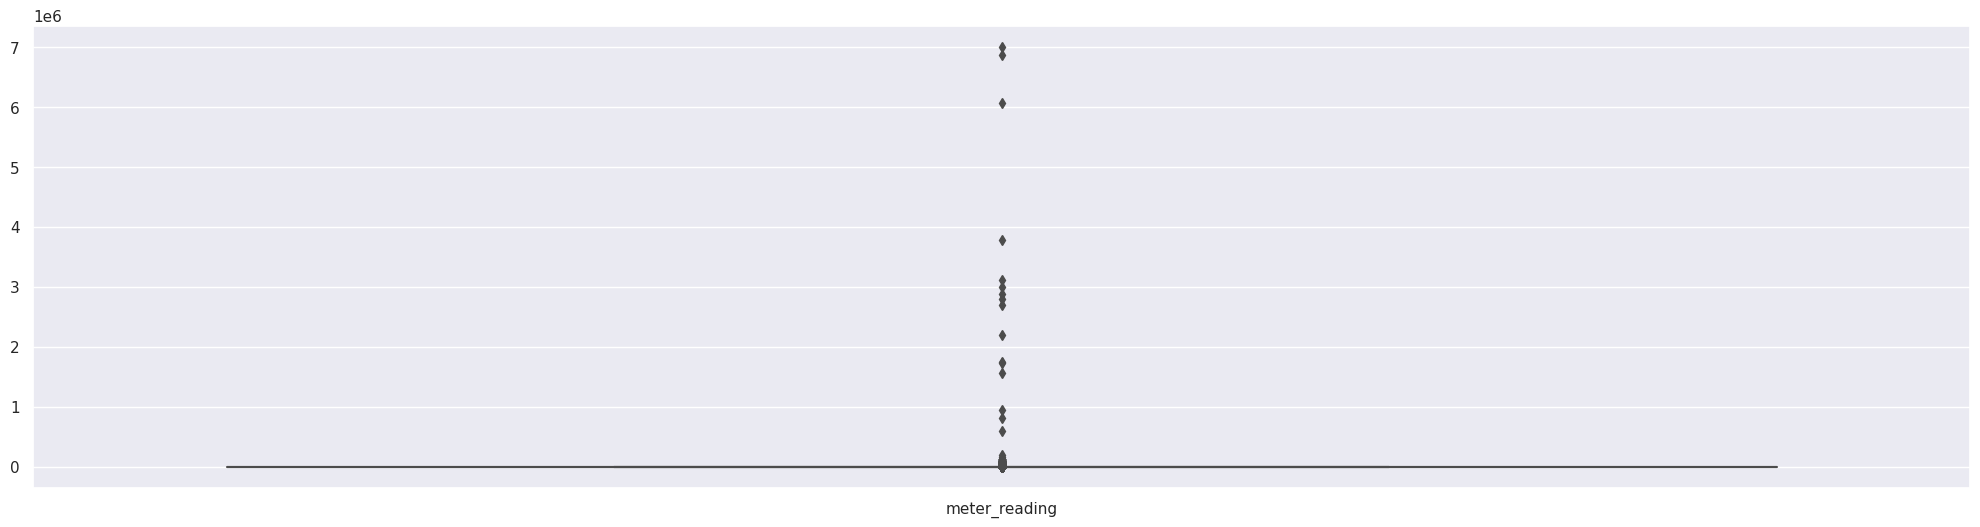

In [ ]:
building4 = building4.drop('building_id', axis=1)

sns.set(rc={'figure.figsize':(25,6)})
sns.boxplot(data=building4)
plt.show()

Tidak terdapat missing value dan outlier sehingga tidak diperlukan tindakan lebih lanjut

# Statistika Deskriptif

In [ ]:
building4 = building4.set_index('timestamp')
building4.tail()

,primary_use,meter_reading
timestamp,,
2016-01-27 23:00:00,Office,2.800
2016-01-28 23:00:00,Office,3.125
2016-01-29 23:00:00,Office,3.050
2016-01-30 23:00:00,Office,2.000
2016-01-31 23:00:00,Office,2.575


In [ ]:
building4.describe()

,meter_reading
count,7.126000e+04
mean,1.170791e+03
std,5.369373e+04
min,0.000000e+00
25%,1.066240e+01
50%,5.697300e+01
75%,2.026968e+02
max,7.008480e+06


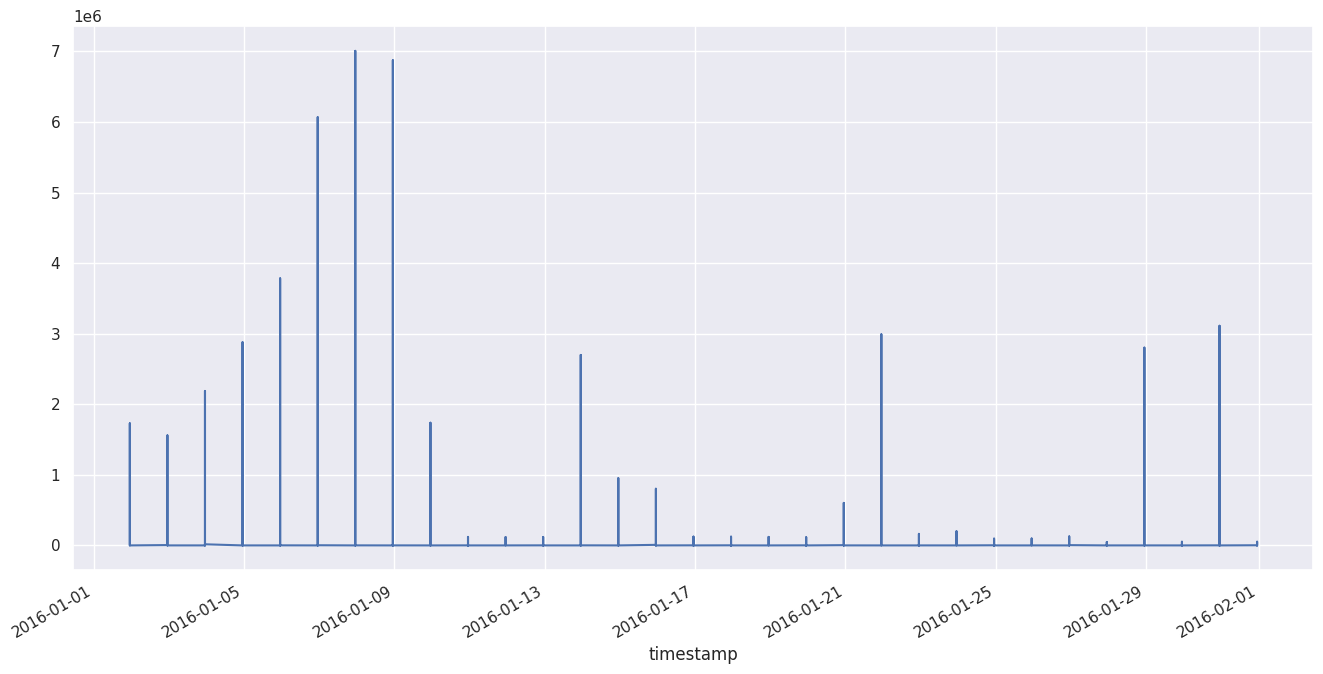

In [ ]:
p = building4['meter_reading'].plot(figsize=(16,8))

Rata-rata penggunaan energi terbesar ada pada 8 Januari 2016 dan rata-rata penggunaan energi terkecil ada pada 3 januari 2016

In [ ]:
building4.loc[building4['meter_reading'] == 7.008480e+06]

,primary_use,meter_reading
timestamp,,
2016-01-07 23:00:00,Education,7008480.0


Penggunaan Energi terbesar ada pada bangunan untuk kategori education pada waktu 7 Januari 2016


# Analisis Rata-Rata Penggunaan Energi Mingguan pada Bangunan Dalam Rentang Waktu Sebulan

In [ ]:
day_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}

building4['weekdays'] = ['']*building4.shape[0]
for i,d in building4.iterrows():
    building4.loc[i,'weekdays'] =  day_[i.weekday()] 
    
building4.head()

,primary_use,meter_reading,weekdays
timestamp,,,
2016-01-01 23:00:00,Education,0.0,Jumat
2016-01-02 23:00:00,Education,0.0,Sabtu
2016-01-03 23:00:00,Education,0.0,Minggu
2016-01-04 23:00:00,Education,0.0,Senin
2016-01-05 23:00:00,Education,0.0,Selasa


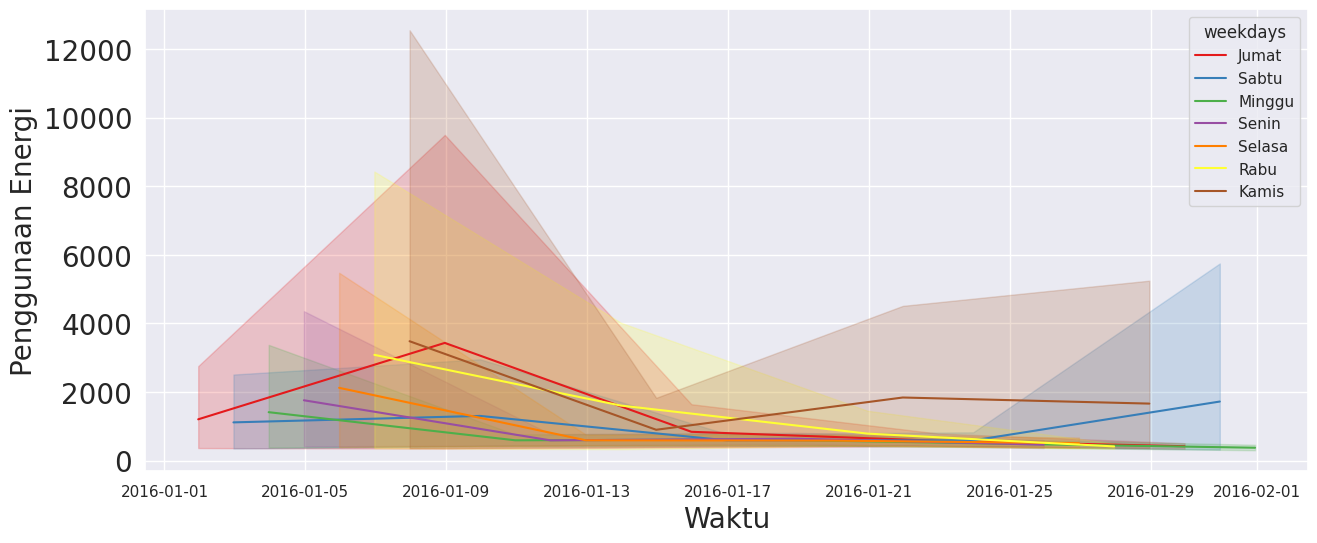

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='timestamp', y='meter_reading', data=building4, hue='weekdays', palette='Set1')
plt.ylabel("Penggunaan Energi", size=20)
plt.xlabel("Waktu", size=20)
plt.rc('ytick', labelsize=20)
plt.show()




*   Analisis Data Rata- Rata Penggunaan Energi Mingguan Pada rentang waktu sebulan

Pada hasil visualisasi grafik rata-rata penggunaan energi mingguan pada rentang waktu sebulan, terlihat bahwa jumlah tertinggi penggunaan energi lebih sering terjadi pada weekday yaitu hari Jumat. Penggunaan energi tertinggi ada pada tanggal 8 Januari 2016.

Sedangkan penggunaan energi terkecil sering terjadi pada Hari Minggu yaitu weekend. Hal ini dimungkinkan karena pada Hari Minggu bangunan mayoritas tidak digunakan karena hari libur.



# Perbandingan Penggunaan Energi pada Bangunan Berdasarkan Kategori Bangunan

In [ ]:
building4

,primary_use,meter_reading,weekdays
timestamp,,,
2016-01-01 23:00:00,Education,0.000,Jumat
2016-01-02 23:00:00,Education,0.000,Sabtu
2016-01-03 23:00:00,Education,0.000,Minggu
2016-01-04 23:00:00,Education,0.000,Senin
2016-01-05 23:00:00,Education,0.000,Selasa
...,...,...,...
2016-01-27 23:00:00,Office,2.800,Rabu
2016-01-28 23:00:00,Office,3.125,Kamis
2016-01-29 23:00:00,Office,3.050,Jumat


In [ ]:
building4.groupby('primary_use').count()

,meter_reading,weekdays
primary_use,,
Education,28657,28657
Entertainment/public assembly,8039,8039
Food sales and service,403,403
Healthcare,1415,1415
Lodging/residential,7629,7629
Manufacturing/industrial,452,452
Office,15418,15418
Other,820,820
Parking,741,741


In [ ]:
meanCategory=building4.groupby('primary_use').mean()
meanCategory

<ipython-input-143-a7eee71413e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanCategory=building4.groupby('primary_use').mean()


,meter_reading
primary_use,
Education,2157.761150
Entertainment/public assembly,284.498850
Food sales and service,362.940137
Healthcare,755.185363
Lodging/residential,304.639291
Manufacturing/industrial,520.012469
Office,647.641239
Other,37.536750
Parking,304.374916


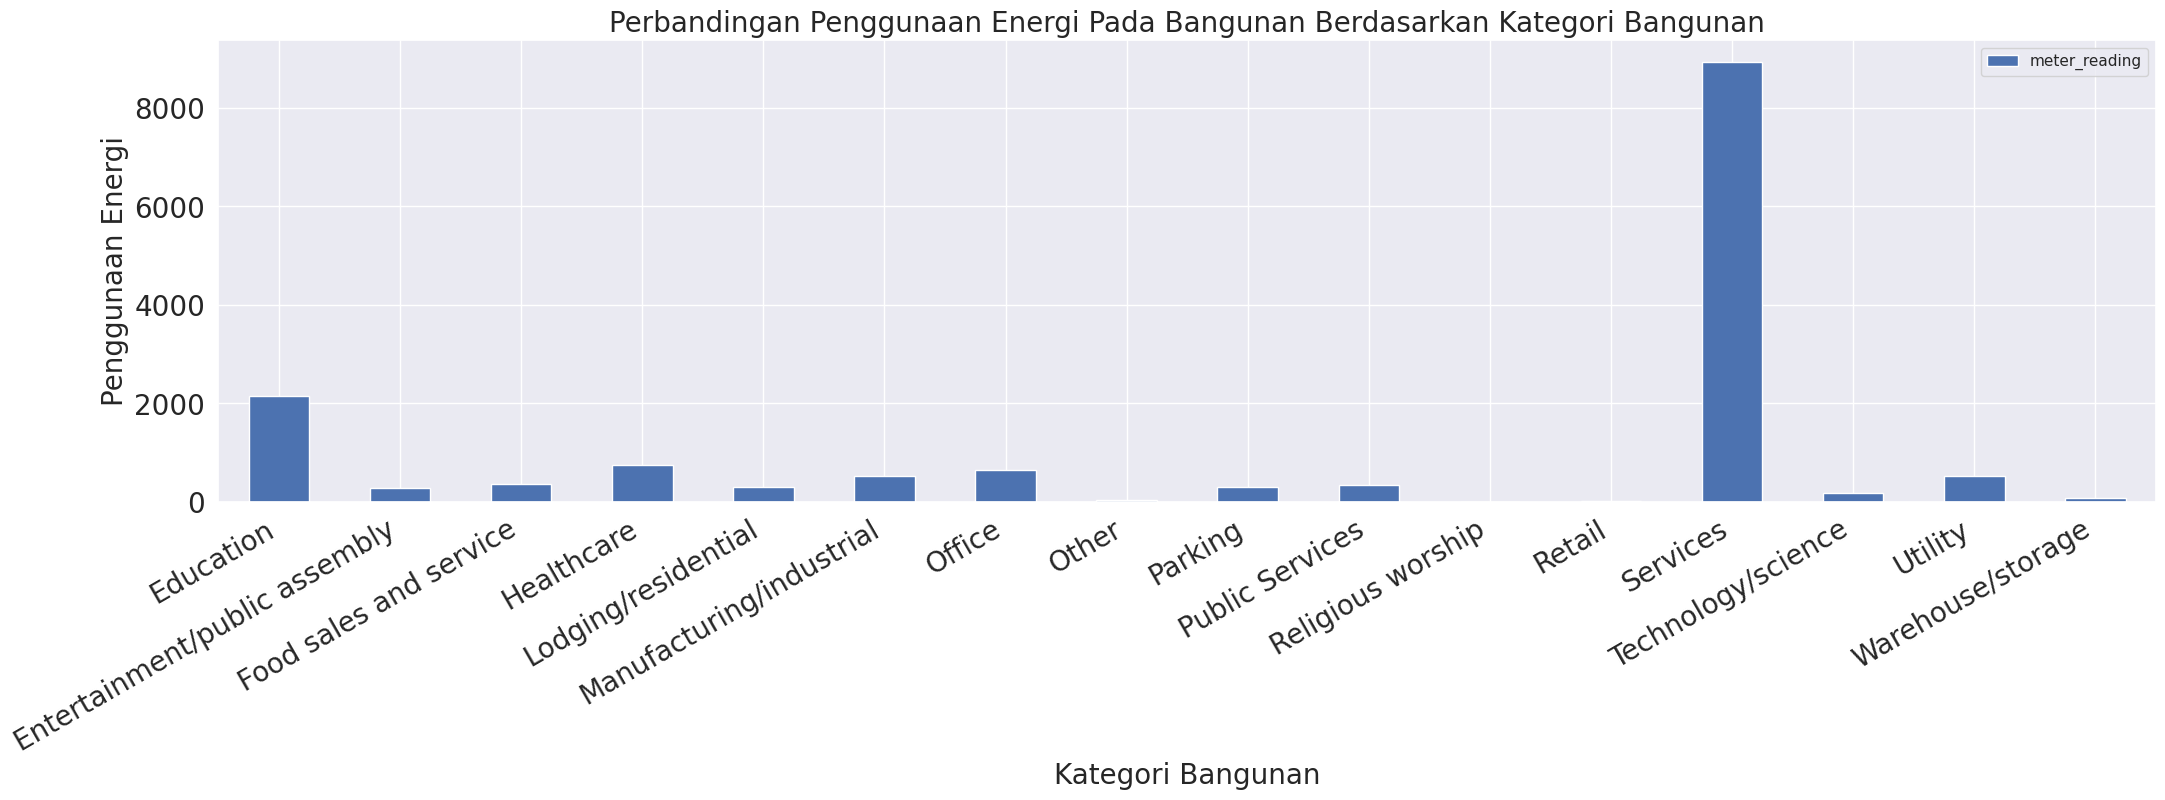

In [ ]:
con = meanCategory[["meter_reading"]]
con.plot(kind='bar')
con_label = ["Education", "Entertainment/public assembly", "Food sales and service", "Healthcare", "Lodging/residential", "Manufacturing/industrial", "Office", "Other", "Parking", "Public Services", "Religious worship", "Retail", "Services", "Technology/science", "Utility", "Warehouse/storage"]

plt.xticks(range(len(con_label)), con_label, rotation=30, ha='right',size= 20)
plt.ylabel("Penggunaan Energi", size=20)
plt.xlabel("Kategori Bangunan", size=20)
plt.title("Perbandingan Penggunaan Energi Pada Bangunan Berdasarkan Kategori Bangunan", size=20)
plt.rc('ytick', labelsize=20)
plt.show()



*   Analisis Penggunaan Energi Berdasarkan Kategori Bangunan

Terlihat jelas penggunaan energi tertinggi ada pada kategori bangunan sevices dengan rata-rata penggunaan energi diatas 8932 kWh perharinya. Bangunan services terdiri dari data center, personal services, repair services, other-services dimana bangunan-bangunan tersebut memerlukan banyak energi listrik untuk penggunaan keperluan pengoperasian jenis pelayanan.

Sedangkan Penggunaan energi terkecil ada pada kategori bangunan religious worship atau bangunan peribadatan. Bangunan peribadatan yaitu dengan rata-rata penggunaan energi 3 kWh perharinya.


